In [1]:
import matplotlib

%matplotlib inline
import error_rates
import fileIO
from matplotlib import pyplot as plt
import numpy as np
chroms = list(range(1,23))+['X']

matplotlib.rc('legend', fontsize=13)
matplotlib.rc('xtick', labelsize=13) 
matplotlib.rc('ytick', labelsize=13)
matplotlib.rc('axes', labelsize=13) 
matplotlib.rc('axes', labelsize=13) 
matplotlib.rcParams.update({'font.size': 13})
matplotlib.rc('lines', linewidth=3)


NEW PLOT (in terms of SNPs, plus SPAN measure)
===

In [16]:
import error_rates
import fileIO
from collections import defaultdict

sim_labs1 = ['sim{}'.format(x) for x in range(0,50)]
sim_labs2 = ['sim{}'.format(x) for x in range(0,20)]

C_covs  = [2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66, 68, 70, 72, 74, 76, 78, 80, 82, 84, 86, 88, 90, 92, 94, 96, 98, 100]
L_lens  = [0.1195, 0.5, 1, 2, 3, 4, 8, 16, 24, 32, 40, 48, 56, 64, 80, 96, 112, 128, 144, 160]
#S_spans = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100]

S_spans = []
for S_sim in sim_labs2:
    cov_dict = defaultdict(int)
    frag_matrix = 'hapcut2_paper/data/sim_vary_span/{}'.format(S_sim)
    
    with open(frag_matrix,"r") as fm:
        for line in fm:
            if len(line) < 2:
                continue

            el = line.strip().split()

            num_blks      = int(el[0])

            call_list  = el[2:(2+2*num_blks)]              # extract base call part of line
            call_list  = zip(*[iter(call_list)]*2)             # list -> tuple list conversion: credit to http://stackoverflow.com/questions/23286254/convert-list-to-a-list-of-tuples-python
            call_list  = [(int(a)-1, b) for a,b in call_list]  # convert index to 0-based integer
            call_list2 = []

            for ix, blk in call_list:
                curr_ix = ix
                for a in blk:
                    call_list2.append((curr_ix, a))
                    curr_ix += 1

            firstpos = call_list2[0][0]
            lastpos  = call_list2[-1][0]

            for i in range(firstpos, lastpos+1):
                cov_dict[i] += 1
    
    span_counts = list(cov_dict.values())
    mean_num = sum(span_counts)/len(span_counts)
    S_spans.append(mean_num)



In [17]:
C_hapcut2 = []
C_probhap = []
C_refhap  = []
C_hapcut1 = []
C_haptree = []
C_mixsih  = []

L_hapcut2 = []
L_probhap = []
L_refhap  = []
L_hapcut1 = []
L_haptree=  []
L_mixsih  = []

S_hapcut2 = []
S_probhap = []
S_refhap  = []
S_hapcut1 = []
S_haptree = []
S_mixsih  = []

for lab in sim_labs1:

    C_hapcut2.append(fileIO.parse_runtime_file('hapcut2_paper/experiments/sim_vary_coverage/{}/hapcut2.runtime'.format(lab))/3600)
    C_refhap.append(fileIO.parse_runtime_file('hapcut2_paper/experiments/sim_vary_coverage/{}/refhap.runtime'.format(lab))/3600)
    C_probhap.append(fileIO.parse_runtime_file('hapcut2_paper/experiments/sim_vary_coverage/{}/probhap.runtime'.format(lab))/3600)
    C_hapcut1.append(fileIO.parse_runtime_file('hapcut2_paper/experiments/sim_vary_coverage/{}/hapcut1.runtime'.format(lab))/3600)
    C_haptree.append(fileIO.parse_runtime_file('hapcut2_paper/experiments/sim_vary_coverage/{}/haptree.runtime'.format(lab))/3600)
    C_mixsih.append(fileIO.parse_runtime_file('hapcut2_paper/experiments/sim_vary_coverage/{}/mixsih.runtime'.format(lab))/3600)
    

for lab in sim_labs2:
    
    L_hapcut2.append(fileIO.parse_runtime_file('hapcut2_paper/experiments/sim_vary_length/{}/hapcut2.runtime'.format(lab))/3600)
    L_refhap.append(fileIO.parse_runtime_file('hapcut2_paper/experiments/sim_vary_length/{}/refhap.runtime'.format(lab))/3600)
    L_probhap.append(fileIO.parse_runtime_file('hapcut2_paper/experiments/sim_vary_length/{}/probhap.runtime'.format(lab))/3600)
    L_hapcut1.append(fileIO.parse_runtime_file('hapcut2_paper/experiments/sim_vary_length/{}/hapcut1.runtime'.format(lab))/3600)
    L_haptree.append(fileIO.parse_runtime_file('hapcut2_paper/experiments/sim_vary_length/{}/haptree.runtime'.format(lab))/3600)
    L_mixsih.append(fileIO.parse_runtime_file('hapcut2_paper/experiments/sim_vary_length/{}/mixsih.runtime'.format(lab))/3600)

    
    S_hapcut2.append(fileIO.parse_runtime_file('hapcut2_paper/experiments/sim_vary_span/{}/hapcut2.runtime'.format(lab))/3600)
    S_refhap.append(fileIO.parse_runtime_file('hapcut2_paper/experiments/sim_vary_span/{}/refhap.runtime'.format(lab))/3600)
    S_probhap.append(fileIO.parse_runtime_file('hapcut2_paper/experiments/sim_vary_span/{}/probhap.runtime'.format(lab))/3600)
    S_hapcut1.append(fileIO.parse_runtime_file('hapcut2_paper/experiments/sim_vary_span/{}/hapcut1.runtime'.format(lab))/3600)
    S_haptree.append(fileIO.parse_runtime_file('hapcut2_paper/experiments/sim_vary_span/{}/haptree.runtime'.format(lab))/3600)
    S_mixsih.append(fileIO.parse_runtime_file('hapcut2_paper/experiments/sim_vary_span/{}/mixsih.runtime'.format(lab))/3600)

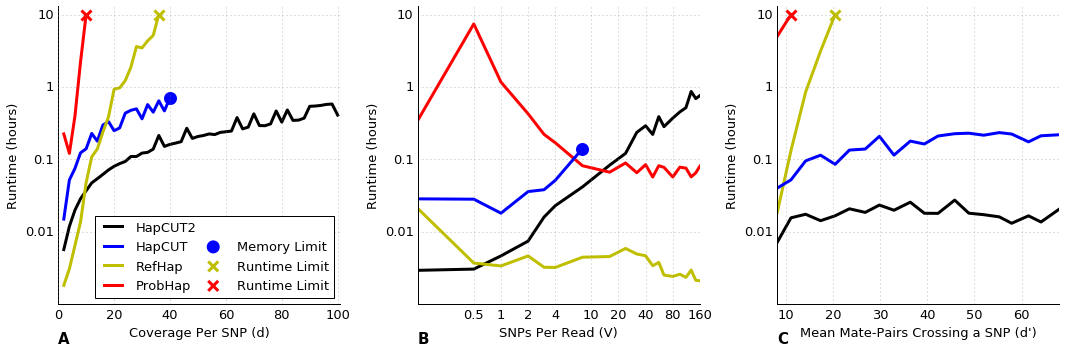

In [49]:
-


HiC completeness with coverage
========

Ran Selvaraj chr1 on cluster with following command:
```
qsub.py -w 10:00:00 -n run_selvaraj_chr1 -c "/home/pedge/git/hapcut2/build/extractHAIRS --bam /oasis/tscc/scratch/pedge/data/hic_selvaraj/data/chr1.all.trcr.bam --VCF hapcut2_paper/data/NA12878_VCFs_hg18/chr1.vcf --HiC 1 --out hapcut2_paper/data/hic_selvaraj/chr1.newformat; /home/pedge/git/hapcut2/build/HAPCUT2 --fragments hapcut2_paper/data/hic_selvaraj/chr1.newformat --vcf hapcut2_paper/data/NA12878_VCFs_hg18/chr1.vcf --output hapcut2_paper/experiments/hic/hic_selvaraj_chr1_dist88.output --converge 10 --nf 1 --htrans hapcut2_paper/experiments/hic/hapcut_htrans/mboI/kfold_htrans_probs88/chr1/HTRANS_PROBS"
```

In [19]:
import error_rates as e

chrnum = 1

#mboI_covs = [i*11 for i in range(1,20)]
#hindIII_covs = [i*11 for i in range(1,20)]

mboI_covs = sorted(list(set([i*2 for i in range(1,31)] + [i*11 for i in range(1,20)])))
hindIII_covs = mboI_covs

hapblocks_mboI = ['hapcut2_paper/experiments/hic/hapcut_htrans/mboI/cov{}/hapcut2/chr{}.output'.format(x,chrnum) for x in mboI_covs]
hapblocks_hindIII = ['hapcut2_paper/experiments/hic/hapcut_htrans/hindIII/cov{}/hapcut2/chr{}.output'.format(x,chrnum) for x in hindIII_covs]

# this isn't the correct frag file but it's only used for getting missing rate and we aren't looking at that
frag_file = '/home/peter/git/HapTools/hapcut2_paper/data/hic_mboI_subsamples/cov33/chr{}'.format(chrnum)
runtime_file = '/home/peter/data/runtime_filler' # we don't care about runtime either

vcf_file = '/home/peter/data/NA12878_VCFs_hg19/chr{}.vcf'.format(chrnum)
errs_mboI = []
errs_hindIII = []

for assembly_file in hapblocks_mboI:
    err = e.hapblock_vcf_error_rate(assembly_file, frag_file, vcf_file, runtime_file,largest_blk_only=True)
    errs_mboI.append(err)
    
for assembly_file in hapblocks_hindIII:
    err = e.hapblock_vcf_error_rate(assembly_file, frag_file, vcf_file, runtime_file,largest_blk_only=True)
    errs_hindIII.append(err)

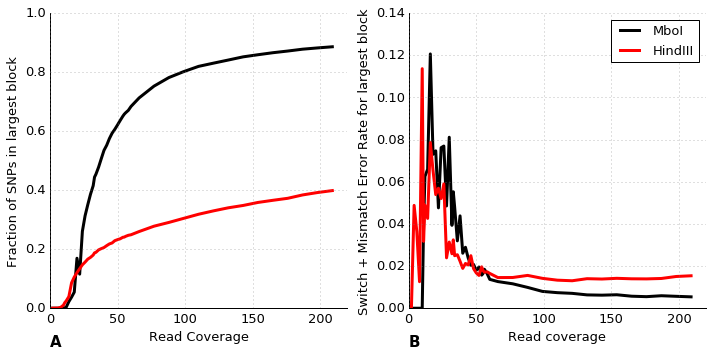

In [20]:
import matplotlib
%matplotlib inline
from matplotlib import pyplot as plt

chrom = 'chr{}'.format(chrnum)
switch_rates_mboI = []
mismatch_rates_mboI = []
switch_mismatch_rates_mboI = []
max_blks_mboI = []
AN50_mboI = []
for err in errs_mboI:
    switch_rates_mboI.append(err.get_switch_rate())
    mismatch_rates_mboI.append(err.get_mismatch_rate())
    switch_mismatch_rates_mboI.append(err.get_switch_mismatch_rate())
    #switch_mismatch_rates_mboI.append(err.get_flat_error_rate())
    max_blks_mboI.append(err.get_max_blk_snp_percent())
    AN50_mboI.append(err.get_AN50())

    
switch_rates_hindIII = []
mismatch_rates_hindIII = []
max_blks_hindIII = []
switch_mismatch_rates_hindIII = []

AN50_hindIII = []
for err in errs_hindIII:
    switch_rates_hindIII.append(err.get_switch_rate())
    mismatch_rates_hindIII.append(err.get_mismatch_rate())
    switch_mismatch_rates_hindIII.append(err.get_switch_mismatch_rate())
    #switch_mismatch_rates_hindIII.append(err.get_flat_error_rate())
    max_blks_hindIII.append(err.get_max_blk_snp_percent())
    AN50_hindIII.append(err.get_AN50())

plt.figure(figsize=(10,5))

ax1=plt.subplot(1,2,1)
plt.plot(mboI_covs,max_blks_mboI, color='k',linestyle='-',label='MboI')
plt.plot(hindIII_covs,max_blks_hindIII, color='r',linestyle='-',label='HindIII')
#plt.scatter(cov_selvaraj,[err_selvaraj.max_blk['chr1']],marker='o',facecolors='b', edgecolors='b',s=100,label='HindIII (Selvaraj et al)')
plt.xlim(0,220)
plt.ylim(0,1)
plt.xlabel("Read Coverage")
plt.ylabel("Fraction of SNPs in largest block")
#plt.legend(loc='lower right',scatterpoints = 1)
plt.grid(True,color='grey')
ax1.spines["top"].set_visible(False)
ax1.spines["right"].set_visible(False)
#ax1.spines["bottom"].set_visible(False)
#ax1.spines["left"].set_visible(False)
plt.tick_params(axis="both", which="both", bottom="off", top="off",
            labelbottom="on", left="off", right="off", labelleft="on")
ax1.text(0, -0.09, 'A', transform=ax1.transAxes,fontsize=15, fontweight='bold', va='top')

ax2=plt.subplot(1,2,2)
plt.plot(mboI_covs,switch_mismatch_rates_mboI, color='k',linestyle='-',label='MboI')
plt.plot(hindIII_covs,switch_mismatch_rates_hindIII, color='r',linestyle='-',label='HindIII')
#plt.scatter(cov_selvaraj,[1-err_selvaraj.get_switch_rate()],marker='o',facecolors='b', edgecolors='b',s=100,label='HindIII (Selvaraj et al)')
plt.xlim(0,220)
#plt.ylim(0.975,1)
plt.xlabel("Read coverage")
plt.ylabel("Switch + Mismatch Error Rate for largest block")
plt.tight_layout()
#plt.legend(loc='lower right',scatterpoints = 1)
plt.grid(True,color='grey')
ax2.spines["top"].set_visible(False)
ax2.spines["right"].set_visible(False)
#ax2.spines["bottom"].set_visible(False)
#ax2.spines["left"].set_visible(False)
plt.tick_params(axis="both", which="both", bottom="off", top="off",
            labelbottom="on", left="off", right="off", labelleft="on")
ax2.text(0, -0.09, 'B', transform=ax2.transAxes,fontsize=15, fontweight='bold', va='top')
plt.legend(loc='upper right',scatterpoints = 1)

plt.tight_layout()
plt.savefig("hapcut2_paper/plots/jupyter/hic_completeness.png",bbox_inches='tight')


PacBio Completeness with increasing depth
====


FOSMID COMMON ERROR
===

In [21]:
# FOSMID
from error_rates import hapblock_vcf_error_rate_COMMON_ALL_CHROM as common_error
chroms = ['chr{}'.format(x) for x in range(1,23)]+['chrX']
tool_list = ['hapcut','refhap','hapcut2', 'probhap']
A_list = [['hapcut2_paper/experiments/fosmid/{}/hapcut1.output'.format(x),'hapcut2_paper/experiments/fosmid/{}/refhap.output'.format(x),'hapcut2_paper/experiments/fosmid/{}/hapcut2.output'.format(x),'hapcut2_paper/experiments/fosmid/{}/probhap.output.uncorrected'.format(x)] for x in chroms]
R_list = [['hapcut2_paper/experiments/fosmid/{}/hapcut1.runtime'.format(x),'hapcut2_paper/experiments/fosmid/{}/refhap.runtime'.format(x),'hapcut2_paper/experiments/fosmid/{}/hapcut2.runtime'.format(x),'hapcut2_paper/experiments/fosmid/{}/probhap.runtime'.format(x)] for x in chroms]
frag_files = ['hapcut2_paper/data/fosmid/{}'.format(x) for x in chroms]
vcf_files = ['hapcut2_paper/data/NA12878_VCFs_hg18/{}.vcf'.format(x) for x in chroms]

fosmid_common = common_error(tool_list,A_list,R_list,frag_files,vcf_files,dataset_name='fosmid')

ERROR RESULTS ACROSS ALL CHROM, FOR COMMON PHASED SNPS

tool:            hapcut
dataset:         fosmid
switch rate:     0.005122116143158437
mismatch rate:   0.008226669093641198
flat rate:       0.11523378348547107
missing rate:    0.014844703699865791
switch errors:   6363
poss. switch:    1242260
mismatch errors: 10621
poss. mismatch:  1291045
flat errors:     148772
poss. flat:      1291045
phased count:    1559158
num covered:     1582652
AN50:            217491.7814726841
N50:             121139
max blk snp %:   0.016764211937100024
runtime:         6563.010493278503
        

tool:            refhap
dataset:         fosmid
switch rate:     0.0034211839711493566
mismatch rate:   0.0067859757018539245
flat rate:       0.07839850663609711
missing rate:    0.014844703699865791
switch errors:   4250
poss. switch:    1242260
mismatch errors: 8761
poss. mismatch:  1291045
flat errors:     101216
poss. flat:      1291045
phased count:    1559158
num covered:     1582652
AN50:          

PACBIO 11x COMMON ERROR
===

In [22]:
# PACBIO11
from error_rates import hapblock_vcf_error_rate_COMMON_ALL_CHROM as common_error
chroms = ['chr{}'.format(x) for x in range(1,23)]+['chrX']
tool_list = ['hapcut','refhap','hapcut2', 'probhap']
A_list = [['hapcut2_paper/experiments/pacbio11/{}/hapcut1.output'.format(x),'hapcut2_paper/experiments/pacbio11/{}/refhap.output'.format(x),'hapcut2_paper/experiments/pacbio11/{}/hapcut2.output'.format(x),'hapcut2_paper/experiments/pacbio11/{}/probhap.output.uncorrected'.format(x)] for x in chroms]
R_list = [['hapcut2_paper/experiments/pacbio11/{}/hapcut1.runtime'.format(x),'hapcut2_paper/experiments/pacbio11/{}/refhap.runtime'.format(x),'hapcut2_paper/experiments/pacbio11/{}/hapcut2.runtime'.format(x),'hapcut2_paper/experiments/pacbio11/{}/probhap.runtime'.format(x)] for x in chroms]
frag_files = ['hapcut2_paper/data/pacbio11/{}'.format(x) for x in chroms]
vcf_files = ['hapcut2_paper/data/NA12878_VCFs_hg19/{}.vcf'.format(x) for x in chroms]

pacbio11_common = common_error(tool_list,A_list,R_list,frag_files,vcf_files,dataset_name='pacbio11')

ERROR RESULTS ACROSS ALL CHROM, FOR COMMON PHASED SNPS

tool:            hapcut
dataset:         pacbio11
switch rate:     0.014298978791378501
mismatch rate:   0.008519933187859204
flat rate:       0.1784636561347383
missing rate:    0.01007914258424325
switch errors:   18064
poss. switch:    1263307
mismatch errors: 11686
poss. mismatch:  1371607
flat errors:     244782
poss. flat:      1371607
phased count:    1660321
num covered:     1677226
AN50:            91294.77464788733
N50:             7710
max blk snp %:   0.009251069238241903
runtime:         6340.9091947078705
        

tool:            refhap
dataset:         pacbio11
switch rate:     0.006750536488755307
mismatch rate:   0.007849916193195281
flat rate:       0.08482969247021924
missing rate:    0.01007914258424325
switch errors:   8528
poss. switch:    1263307
mismatch errors: 10767
poss. mismatch:  1371607
flat errors:     116353
poss. flat:      1371607
phased count:    1660321
num covered:     1677226
AN50:          

PACBIO44 COMMON ERROR
====

In [23]:
from error_rates import hapblock_vcf_error_rate_COMMON_ALL_CHROM as common_error
chroms = ['chr{}'.format(x) for x in range(1,23)]+['chrX']
tool_list = ['hapcut','refhap','hapcut2']
A_list = [['hapcut2_paper/experiments/pacbio44/{}/hapcut1.output'.format(x),'hapcut2_paper/experiments/pacbio44/{}/refhap.output'.format(x),'hapcut2_paper/experiments/pacbio44/{}/hapcut2.output'.format(x)] for x in chroms]
R_list = [['hapcut2_paper/experiments/pacbio44/{}/hapcut1.runtime'.format(x),'hapcut2_paper/experiments/pacbio44/{}/refhap.runtime'.format(x),'hapcut2_paper/experiments/pacbio44/{}/hapcut2.runtime'.format(x)] for x in chroms]
frag_files = ['hapcut2_paper/data/pacbio44/{}'.format(x) for x in chroms]
vcf_files = ['hapcut2_paper/data/NA12878_VCFs_hg19/{}.vcf'.format(x) for x in chroms]

pacbio44_common = common_error(tool_list,A_list,R_list,frag_files,vcf_files,dataset_name='pacbio44')

ERROR RESULTS ACROSS ALL CHROM, FOR COMMON PHASED SNPS

tool:            hapcut
dataset:         pacbio44
switch rate:     0.0030338666630620728
mismatch rate:   0.003810541182880884
flat rate:       0.07165968246685044
missing rate:    0.001502870731799777
switch errors:   4040
poss. switch:    1331634
mismatch errors: 5315
poss. mismatch:  1394815
flat errors:     99952
poss. flat:      1394815
phased count:    1686230
num covered:     1688768
AN50:            218293.82470119523
N50:             55877
max blk snp %:   0.01572346991155952
runtime:         25010.876049995422
        

tool:            refhap
dataset:         pacbio44
switch rate:     0.0025284725382499996
mismatch rate:   0.0038786505737320003
flat rate:       0.04575158712804207
missing rate:    0.001502870731799777
switch errors:   3367
poss. switch:    1331634
mismatch errors: 5410
poss. mismatch:  1394815
flat errors:     63815
poss. flat:      1394815
phased count:    1686230
num covered:     1688768
AN50:        

In [24]:
max(pacbio44_common['refhap'].runtime.values())/3600

18.69152502199014

HIC COMMON ERROR
===

In [25]:
from error_rates import hapblock_vcf_error_rate_COMMON_ALL_CHROM as common_error
chroms = ['chr{}'.format(x) for x in range(1,23)]+['chrX']
tool_list = ['hapcut','hapcut2']
cov = 33
print("COVERAGE 33")
A_list = [['hapcut2_paper/experiments/hic/hapcut_htrans/mboI/cov{}/hapcut/{}.output'.format(cov,x),'hapcut2_paper/experiments/hic/hapcut_htrans/mboI/cov{}/hapcut2/{}.output'.format(cov,x)] for x in chroms]
R_list = [['hapcut2_paper/experiments/hic/hapcut_htrans/mboI/cov{}/hapcut/{}.runtime'.format(cov,x),'hapcut2_paper/experiments/hic/hapcut_htrans/mboI/cov{}/hapcut2/{}.runtime'.format(cov,x)] for x in chroms]
frag_files = ['hapcut2_paper/data/hic_mboI_subsamples/cov{}/{}'.format(cov,x) for x in chroms]
vcf_files = ['hapcut2_paper/data/NA12878_VCFs_hg19/{}.vcf'.format(x) for x in chroms]
hic33_common = common_error(tool_list,A_list,R_list,frag_files,vcf_files,dataset_name='hic33')

chroms = ['chr{}'.format(x) for x in range(1,23)]+['chrX']
tool_list = ['hapcut','hapcut2']
cov= 44
print("COVERAGE 44")
A_list = [['hapcut2_paper/experiments/hic/hapcut_htrans/mboI/cov{}/hapcut/{}.output'.format(cov,x),'hapcut2_paper/experiments/hic/hapcut_htrans/mboI/cov{}/hapcut2/{}.output'.format(cov,x)] for x in chroms]
R_list = [['hapcut2_paper/experiments/hic/hapcut_htrans/mboI/cov{}/hapcut/{}.runtime'.format(cov,x),'hapcut2_paper/experiments/hic/hapcut_htrans/mboI/cov{}/hapcut2/{}.runtime'.format(cov,x)] for x in chroms]
frag_files = ['hapcut2_paper/data/hic_mboI_subsamples/cov{}/{}'.format(cov,x) for x in chroms]
vcf_files = ['hapcut2_paper/data/NA12878_VCFs_hg19/{}.vcf'.format(x) for x in chroms]
hic44_common = common_error(tool_list,A_list,R_list,frag_files,vcf_files,dataset_name='hic44')


chroms = ['chr{}'.format(x) for x in range(1,23)]+['chrX']
tool_list = ['hapcut','hapcut2']
cov= 88
print("COVERAGE 88")
A_list = [['hapcut2_paper/experiments/hic/hapcut_htrans/mboI/cov{}/hapcut/{}.output'.format(cov,x),'hapcut2_paper/experiments/hic/hapcut_htrans/mboI/cov{}/hapcut2/{}.output'.format(cov,x)] for x in chroms]
R_list = [['hapcut2_paper/experiments/hic/hapcut_htrans/mboI/cov{}/hapcut/{}.runtime'.format(cov,x),'hapcut2_paper/experiments/hic/hapcut_htrans/mboI/cov{}/hapcut2/{}.runtime'.format(cov,x)] for x in chroms]
frag_files = ['hapcut2_paper/data/hic_mboI_subsamples/cov{}/{}'.format(cov,x) for x in chroms]
vcf_files = ['hapcut2_paper/data/NA12878_VCFs_hg19/{}.vcf'.format(x) for x in chroms]
hic88_common = common_error(tool_list,A_list,R_list,frag_files,vcf_files,dataset_name='hic88')

COVERAGE 33
ERROR RESULTS ACROSS ALL CHROM, FOR COMMON PHASED SNPS

tool:            hapcut
dataset:         hic33
switch rate:     0.02740032297877676
mismatch rate:   0.01828038188588254
flat rate:       0.06893009712540994
missing rate:    0.001771104188202699
switch errors:   18138
poss. switch:    661963
mismatch errors: 16800
poss. mismatch:  919018
flat errors:     63348
poss. flat:      919018
phased count:    1131748
num covered:     1133756
AN50:            5945.081081081082
N50:             145975607
max blk snp %:   0.43231290239596293
runtime:         1898.0028553009033
        

tool:            hapcut2
dataset:         hic33
switch rate:     0.021001173781616193
mismatch rate:   0.015766829376573692
flat rate:       0.07203232145616299
missing rate:    0.001771104188202699
switch errors:   13902
poss. switch:    661963
mismatch errors: 14490
poss. mismatch:  919018
flat errors:     66199
poss. flat:      919018
phased count:    1131748
num covered:     1133756
AN50:     

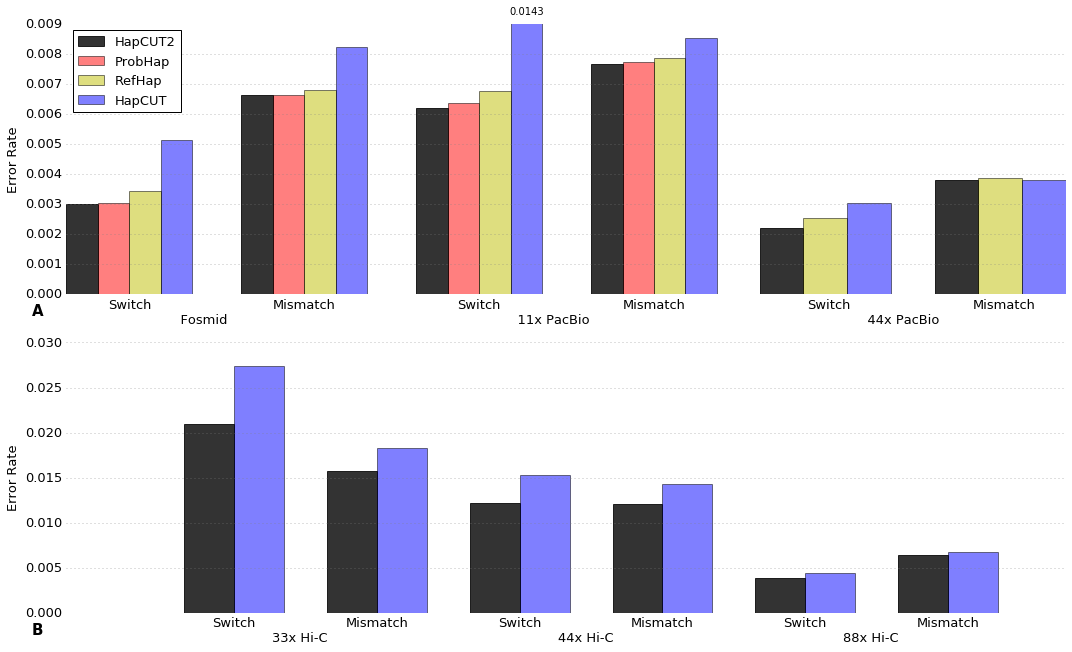

In [26]:
# adapted from http://matplotlib.org/examples/api/barchart_demo.html
#!/usr/bin/env python
# a bar plot with errorbars
import numpy as np
import matplotlib.pyplot as plt

plot_hapcut1 = True

from matplotlib import gridspec

# plot it

alpha1 = 0.8
alpha2 = 0.5

fig = plt.figure(figsize=(15,9))

#####################################################
# PLOT FOSMID
#####################################################

ax = plt.subplot(211)
N = 2


# corrected for same snps
refhap_errs = (fosmid_common['refhap'].get_switch_rate(), fosmid_common['refhap'].get_mismatch_rate())
probhap_errs = (fosmid_common['probhap'].get_switch_rate(), fosmid_common['probhap'].get_mismatch_rate())
hapcut_errs = (fosmid_common['hapcut'].get_switch_rate(), fosmid_common['hapcut'].get_mismatch_rate())
hapcut2_errs = (fosmid_common['hapcut2'].get_switch_rate(), fosmid_common['hapcut2'].get_mismatch_rate())

ind = np.array([0,1])#np.arange(N)  # the x locations for the groups
if plot_hapcut1:
    width = 0.18
else:
    width = 0.25       # the width of the bars

plt.bar(ind, hapcut2_errs, color='k',
        ecolor='black', # black error bar color
        alpha=alpha1,      # transparency
        width=width,      # smaller bar width
        align='center',
        label='HapCUT2')
plt.bar(ind+width, probhap_errs, color='r',
        ecolor='black', # black error bar color
        alpha=alpha2,      # transparency
        width=width,      # smaller bar width
        align='center',
        label='ProbHap')
plt.bar(ind+2*width, refhap_errs, color='y',
        ecolor='black', # black error bar color
        alpha=alpha2,      # transparency
        width=width,      # smaller bar width
        align='center',
        label='RefHap')
plt.bar(ind+3*width, hapcut_errs, color='b',
        ecolor='black', # black error bar color
        alpha=alpha2,      # transparency
        width=width,      # smaller bar width
        align='center',
        label='HapCUT')


ind = np.array([0,1,2,3,4,5])  # the x locations for the groups

# add some text for labels, title and axes ticks
ax.set_ylabel('Error Rate')
ax.set_xticks(ind+1.5*width)
ax.set_xticklabels(('Switch\n                                    Fosmid','Mismatch','Switch\n                                    11x PacBio','Mismatch','Switch\n                                    44x PacBio','Mismatch'))

ax.yaxis.grid(True,color='grey')
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["left"].set_visible(False)
plt.tick_params(axis="both", which="both", bottom="off", top="off",
            labelbottom="on", left="off", right="off", labelleft="on")
plt.legend(loc='upper left')

    
# corrected for same snps
# groups in order are fosmid, pacbio11, pacbio44
ax.text(-0.035, -0.035, 'A', transform=ax.transAxes,fontsize=15, fontweight='bold', va='top')

plt.ylim((0,0.009))

#####################################################
# PLOT PACBIO11
#####################################################

ind = np.array([2,3])#np.arange(N)  # the x locations for the groups
#width = 0.25       # the width of the bars

# corrected for same snps
refhap_errs = (pacbio11_common['refhap'].get_switch_rate(), pacbio11_common['refhap'].get_mismatch_rate())
probhap_errs = (pacbio11_common['probhap'].get_switch_rate(), pacbio11_common['probhap'].get_mismatch_rate())
hapcut_errs = (pacbio11_common['hapcut'].get_switch_rate(), pacbio11_common['hapcut'].get_mismatch_rate())
hapcut2_errs = (pacbio11_common['hapcut2'].get_switch_rate(), pacbio11_common['hapcut2'].get_mismatch_rate())

def label(rect, height, value):
    # attach some text labels
    ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
            '%0.4f' % value,
            ha='center', va='bottom')

plt.bar(ind, hapcut2_errs, color='k',
        ecolor='black', # black error bar color
        alpha=alpha1,      # transparency
        width=width,      # smaller bar width
        align='center',
        label='HapCUT2')
plt.bar(ind+width, probhap_errs, color='r',
        ecolor='black', # black error bar color
        alpha=alpha2,      # transparency
        width=width,      # smaller bar width
        align='center',
        label='ProbHap')
plt.bar(ind+2*width, refhap_errs, color='y',
        ecolor='black', # black error bar color
        alpha=alpha2,      # transparency
        width=width,      # smaller bar width
        align='center',
        label='RefHap')
rects = plt.bar(ind+3*width, hapcut_errs, color='b',
        ecolor='black', # black error bar color
        alpha=alpha2,      # transparency
        width=width,      # smaller bar width
        align='center',
        label='HapCUT2')

label(rects[0],0.0088,hapcut_errs[0])

#####################################################
# PLOT PACBIO44
#####################################################

ind = np.array([4,5])#np.arange(N)  # the x locations for the groups
if plot_hapcut1:
    width = 0.25
else:
    width = 0.35       # the width of the bars

refhap_errs = (pacbio44_common['refhap'].get_switch_rate(), pacbio44_common['refhap'].get_mismatch_rate())
hapcut2_errs = (pacbio44_common['hapcut2'].get_switch_rate(), pacbio44_common['hapcut2'].get_mismatch_rate())
hapcut_errs = (pacbio44_common['hapcut'].get_switch_rate(), pacbio44_common['hapcut'].get_mismatch_rate())

plt.bar(ind, hapcut2_errs, color='k',
        ecolor='black', # black error bar color
        alpha=alpha1,      # transparency
        width=width,      # smaller bar width
        align='center',
        label='HapCUT2')
plt.bar(ind+width, refhap_errs, color='y',
        ecolor='black', # black error bar color
        alpha=alpha2,      # transparency
        width=width,      # smaller bar width
        align='center',
        label='Refhap')
plt.bar(ind+2*width, hapcut_errs, color='b',
        ecolor='black', # black error bar color
        alpha=alpha2,      # transparency
        width=width,      # smaller bar width
        align='center',
        label='HapCUT')

#plt.legend(loc='upper left')


#####################################################
# PLOT ALL HIC
#####################################################
ax = plt.subplot(212)

N = 3

# copy-pasted error results from standard output. lazy, I know.
#hapcut1_switch_errs = (0.027437443,0.01524112,0.00448291)
#hapcut2_switch_errs = (0.0217017,0.012245274,0.00389546)
#hapcut1_mismatch_errs = (0.0186262,0.01471498,0.00448291)
#hapcut2_mismatch_errs = (0.0159582,0.012129349,0.00389546)

hapcut2_errs = (hic33_common['hapcut2'].get_switch_rate(), hic33_common['hapcut2'].get_mismatch_rate(),hic44_common['hapcut2'].get_switch_rate(), hic44_common['hapcut2'].get_mismatch_rate(),hic88_common['hapcut2'].get_switch_rate(), hic88_common['hapcut2'].get_mismatch_rate())
hapcut1_errs = (hic33_common['hapcut'].get_switch_rate(), hic33_common['hapcut'].get_mismatch_rate(),hic44_common['hapcut'].get_switch_rate(), hic44_common['hapcut'].get_mismatch_rate(),hic88_common['hapcut'].get_switch_rate(), hic88_common['hapcut'].get_mismatch_rate())


ind = np.array([0,1,2,3,4,5])  # the x locations for the groups
width = 0.35       # the width of the bars

plt.bar(ind, hapcut2_errs, color='k',
        ecolor='black', # black error bar color
        alpha=alpha1,      # transparency
        width=width,      # smaller bar width
        align='center',
        label='HapCUT2')
plt.bar(ind+width, hapcut1_errs, color='b',
        ecolor='black', # black error bar color
        alpha=alpha2,      # transparency
        width=width,      # smaller bar width
        align='center',
       label='HapCUT')

# add some text for labels, title and axes ticks
ax.set_ylabel('Error Rate')
ax.set_xticks(ind+0.5*width)
ax.set_xticklabels(('Switch\n                                33x Hi-C','Mismatch','Switch\n                                44x Hi-C','Mismatch','Switch\n                                88x Hi-C','Mismatch'))

ax.yaxis.grid(True,color='grey')
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["left"].set_visible(False)

plt.tick_params(axis="both", which="both", bottom="off", top="off",
            labelbottom="on", left="off", right="off", labelleft="on")

ax.text(-0.035, -0.035, 'B', transform=ax.transAxes,fontsize=15, fontweight='bold', va='top')
plt.tight_layout()
plt.savefig("hapcut2_paper/plots/jupyter/common_snps_error_plot.png",bbox_inches='tight')


#plt.legend()

In [27]:
def percent_improved(old, new):
    return str((old-new)/old*100)[:4]+'%'

print("HapCUT2 switch improvement over ProbHap on Fosmid Data")
print(percent_improved(fosmid_common['probhap'].get_switch_rate(),fosmid_common['hapcut2'].get_switch_rate()))
print("HapCUT2 mismatch improvement over ProbHap on PacBio11 Data")
print(percent_improved(fosmid_common['probhap'].get_mismatch_rate(),fosmid_common['hapcut2'].get_mismatch_rate()))
print("")
print("HapCUT2 switch improvement over ProbHap on PacBio11 Data")
print(percent_improved(pacbio11_common['probhap'].get_switch_rate(),pacbio11_common['hapcut2'].get_switch_rate()))
print("HapCUT2 mismatch improvement over ProbHap on PacBio11 Data")
print(percent_improved(pacbio11_common['probhap'].get_mismatch_rate(),pacbio11_common['hapcut2'].get_mismatch_rate()))
print("")
print("HapCUT2 switch improvement over RefHap on PacBio11 Data")
print(percent_improved(pacbio11_common['refhap'].get_switch_rate(),pacbio11_common['hapcut2'].get_switch_rate()))
print("HapCUT2 mismatch improvement over RefHap on PacBio11 Data")
print(percent_improved(pacbio11_common['refhap'].get_mismatch_rate(),pacbio11_common['hapcut2'].get_mismatch_rate()))
print("")
print("HapCUT2 switch improvement over RefHap on PacBio44 Data")
print(percent_improved(pacbio44_common['refhap'].get_switch_rate(),pacbio44_common['hapcut2'].get_switch_rate()))
print("HapCUT2 mismatch improvement over RefHap on PacBio11 Data")
print(percent_improved(pacbio44_common['refhap'].get_mismatch_rate(),pacbio44_common['hapcut2'].get_mismatch_rate()))
print("")
print("HapCUT2 switch improvement over HapCUT on HiC33 Data")
print(percent_improved(hic33_common['hapcut'].get_switch_rate(),hic33_common['hapcut2'].get_switch_rate()))
print("HapCUT2 mismatch improvement over RefHap on HiC33 Data")
print(percent_improved(hic33_common['hapcut'].get_mismatch_rate(),hic33_common['hapcut2'].get_mismatch_rate()))
print("")
print("HapCUT2 switch improvement over HapCUT on HiC44 Data")
print(percent_improved(hic44_common['hapcut'].get_switch_rate(),hic44_common['hapcut2'].get_switch_rate()))
print("HapCUT2 mismatch improvement over RefHap on HiC33 Data")
print(percent_improved(hic44_common['hapcut'].get_mismatch_rate(),hic44_common['hapcut2'].get_mismatch_rate()))
print("")

print("HapCUT2 minutes of runtime on fosmid data:")
print(fosmid_common['hapcut2'].get_runtime()/60)
print("HapCUT2 minutes of runtime on pacbio11 data:")
print(pacbio11_common['hapcut2'].get_runtime()/60)
print("HapCUT2 minutes of runtime on pacbio44 data:")
print(pacbio44_common['hapcut2'].get_runtime()/60)
print("HapCUT2 minutes of runtime on HiC33 data:")
print(hic33_common['hapcut2'].get_runtime()/60)
print("HapCUT2 hours of runtime on HiC88 data:")
print(hic88_common['hapcut2'].get_runtime()/3600)

print("runtimes for known model")
for cov in ['cov33','cov44','cov88']:
    total_runtime = 0
    for chrom in chroms:
        runtime_file = 'hapcut2_paper/experiments/hic/hapcut_htrans/mboI/{}/hapcut2_known_model/{}.runtime'.format(cov,chrom)
        runtime = fileIO.parse_runtime_file(runtime_file)
        total_runtime+=runtime
    print(cov+': seconds of total runtime, known hic model')
    print(total_runtime)

HapCUT2 switch improvement over ProbHap on Fosmid Data
0.72%
HapCUT2 mismatch improvement over ProbHap on PacBio11 Data
0.29%

HapCUT2 switch improvement over ProbHap on PacBio11 Data
2.60%
HapCUT2 mismatch improvement over ProbHap on PacBio11 Data
0.88%

HapCUT2 switch improvement over RefHap on PacBio11 Data
8.32%
HapCUT2 mismatch improvement over RefHap on PacBio11 Data
2.57%

HapCUT2 switch improvement over RefHap on PacBio44 Data
12.4%
HapCUT2 mismatch improvement over RefHap on PacBio11 Data
2.03%

HapCUT2 switch improvement over HapCUT on HiC33 Data
23.3%
HapCUT2 mismatch improvement over RefHap on HiC33 Data
13.7%

HapCUT2 switch improvement over HapCUT on HiC44 Data
20.1%
HapCUT2 mismatch improvement over RefHap on HiC33 Data
15.3%

HapCUT2 minutes of runtime on fosmid data:
69.18159102598825
HapCUT2 minutes of runtime on pacbio11 data:
52.9202664732933
HapCUT2 minutes of runtime on pacbio44 data:
245.18372607628504
HapCUT2 minutes of runtime on HiC33 data:
149.63450104395548


In [28]:
from collections import defaultdict
chroms = ['chr{}'.format(x) for x in range(1,23)]+['chrX']
runtimes = defaultdict(float)
tools = ['hapcut1','hapcut2','probhap','refhap']
datas = ['fosmid','pacbio11','pacbio44']
for d in datas:
    for t in tools:
        for c in chroms:
            runtimes[(d,t)] += fileIO.parse_runtime_file('hapcut2_paper/experiments/{}/{}/{}.runtime'.format(d,c,t))

for d in datas:
    for t in tools:
        print("{} {} runtime (hours): {:.2f} ... (minutes) {:.2f} ".format(d,t,runtimes[d,t]/3600,runtimes[d,t]/60))


fosmid hapcut1 runtime (hours): 1.82 ... (minutes) 109.38 
fosmid hapcut2 runtime (hours): 1.15 ... (minutes) 69.18 
fosmid probhap runtime (hours): 0.52 ... (minutes) 31.35 
fosmid refhap runtime (hours): 0.03 ... (minutes) 1.71 
pacbio11 hapcut1 runtime (hours): 1.76 ... (minutes) 105.68 
pacbio11 hapcut2 runtime (hours): 0.88 ... (minutes) 52.92 
pacbio11 probhap runtime (hours): 52.55 ... (minutes) 3152.79 
pacbio11 refhap runtime (hours): 0.42 ... (minutes) 25.29 
pacbio44 hapcut1 runtime (hours): 6.95 ... (minutes) 416.85 
pacbio44 hapcut2 runtime (hours): 4.09 ... (minutes) 245.18 
pacbio44 probhap runtime (hours): 0.00 ... (minutes) 0.00 
pacbio44 refhap runtime (hours): 215.89 ... (minutes) 12953.13 


Head-to-head comparison: PacBio and Hi-C
===

In [52]:
import matplotlib
%matplotlib inline
import fileIO
import error_rates as e
chroms = list(range(1,23))+['X']
def per_distance_error_rate_genome(files, vcf_files, FRAC, BINSIZE):

    res = e.PDER_result([],[], binsize=BINSIZE, sample_frac=FRAC,max_dist=0)
    for file,vcf in zip(files,vcf_files):
        res += e.per_distance_error_rate(file, vcf,binsize=BINSIZE, sample_frac=FRAC)
    return res

vcf_files18 = ['/home/peter/data/NA12878_VCFs_hg18/chr{}.vcf'.format(x) for x in chroms]
vcf_files19 = ['/home/peter/data/NA12878_VCFs_hg19/chr{}.vcf'.format(x) for x in chroms]
# fosmid
#h_f_files = ['hapcut2_paper/experiments/fosmid/chr{}/hapcut2.output'.format(x) for x in chroms]
#r_f_files = ['hapcut2_paper/experiments/fosmid/chr{}/refhap.output'.format(x) for x in chroms]
#p_f_files = ['hapcut2_paper/experiments/fosmid/chr{}/probhap.output'.format(x) for x in chroms]
#h_f = per_distance_error_rate_genome(h_f_files,vcf_files18)
#r_f = per_distance_error_rate_genome(r_f_files,vcf_files18)
#p_f = per_distance_error_rate_genome(p_f_files,vcf_files18)
# pacbio 11
h_p11_files = ['hapcut2_paper/experiments/pacbio11/chr{}/hapcut2.output'.format(x) for x in chroms]
#r_p11_files = ['hapcut2_paper/experiments/pacbio11/chr{}/refhap.output'.format(x) for x in chroms]
#p_p11_files = ['hapcut2_paper/experiments/pacbio11/chr{}/probhap.output'.format(x) for x in chroms]

h_p11 = per_distance_error_rate_genome(h_p11_files,vcf_files19,0.01,20000)
#r_p11 = per_distance_error_rate_genome(r_p11_files,vcf_files19)
#p_p11 = per_distance_error_rate_genome(p_p11_files,vcf_files19)
## pacbio 44
h_p44_files = ['hapcut2_paper/experiments/pacbio44/chr{}/hapcut2.output'.format(x) for x in chroms]
#r_p44_files = ['hapcut2_paper/experiments/pacbio44/chr{}/refhap.output'.format(x) for x in chroms]
h_p44 = per_distance_error_rate_genome(h_p44_files,vcf_files19,0.01,20000)
#r_p44 = per_distance_error_rate_genome(r_p44_files,vcf_files19)

# hic 88
hic88_files = ['hapcut2_paper/experiments/hic/hapcut_htrans/mboI/cov88/hapcut2/chr{}.output'.format(x) for x in chroms]
hic88 = per_distance_error_rate_genome(hic88_files,vcf_files19,0.0001,20000)

hic44_files = ['hapcut2_paper/experiments/hic/hapcut_htrans/mboI/cov44/hapcut2/chr{}.output'.format(x) for x in chroms]
hic44 = per_distance_error_rate_genome(hic44_files,vcf_files19,0.0001,20000)

pacbio_covs = [i*2 for i in range(1,23)]

# pacbio error_rates
pacbio_hapblocks = ['hapcut2_paper/experiments/pacbio/cov{}/chr1/hapcut2.output'.format(x) for x in pacbio_covs]

# this isn't the correct frag file but it's only used for getting missing rate and we aren't looking at that
pacbio_frag_file = '/home/peter/git/HapTools/hapcut2_paper/data/pacbio44/chr1'
pacbio_runtime_file = '/home/peter/data/runtime_filler' # we don't care about runtime either

pacbio_vcf_file = '/home/peter/data/NA12878_VCFs_hg19/chr1.vcf'
pacbio_errs = []

for assembly_file in pacbio_hapblocks:
    err = e.hapblock_vcf_error_rate(assembly_file, pacbio_frag_file, pacbio_vcf_file, pacbio_runtime_file)
    pacbio_errs.append(err)
    
    
chrnum = 1

#mboI_covs = [i*11 for i in range(1,20)]
#hindIII_covs = [i*11 for i in range(1,20)]

mboI_covs = sorted(list(set([i*2 for i in range(1,31)] + [i*11 for i in range(1,20)])))
hindIII_covs = mboI_covs

hapblocks_mboI = ['hapcut2_paper/experiments/hic/hapcut_htrans/mboI/cov{}/hapcut2/chr{}.output'.format(x,chrnum) for x in mboI_covs]
hapblocks_hindIII = ['hapcut2_paper/experiments/hic/hapcut_htrans/hindIII/cov{}/hapcut2/chr{}.output'.format(x,chrnum) for x in hindIII_covs]

# this isn't the correct frag file but it's only used for getting missing rate and we aren't looking at that
frag_file = '/home/peter/git/HapTools/hapcut2_paper/data/hic_mboI_subsamples/cov33/chr{}'.format(chrnum)
runtime_file = '/home/peter/data/runtime_filler' # we don't care about runtime either

vcf_file = '/home/peter/data/NA12878_VCFs_hg19/chr{}.vcf'.format(chrnum)
errs_mboI = []
errs_hindIII = []

for assembly_file in hapblocks_mboI:
    err = e.hapblock_vcf_error_rate(assembly_file, frag_file, vcf_file, runtime_file)
    errs_mboI.append(err)
    
for assembly_file in hapblocks_hindIII:
    err = e.hapblock_vcf_error_rate(assembly_file, frag_file, vcf_file, runtime_file)
    errs_hindIII.append(err)
    


vcf_file = 'hapcut2_paper/data/NA12878_VCFs_hg19/chr1.vcf'
hapblock_list_pacbio11 = fileIO.parse_hapblock_file('hapcut2_paper/experiments/pacbio11/chr1/hapcut2.output')
num_blks_pacbio11, frac_phased_pacbio11 = e.frac_SNPs_per_num_blks(hapblock_list_pacbio11, vcf_file, use_SNP_index=True)
hapblock_list_pacbio44= fileIO.parse_hapblock_file('hapcut2_paper/experiments/pacbio44/chr1/hapcut2.output')
num_blks_pacbio44, frac_phased_pacbio44 = e.frac_SNPs_per_num_blks(hapblock_list_pacbio44, vcf_file,use_SNP_index=True)

hapblock_list_mboI88 = fileIO.parse_hapblock_file('hapcut2_paper/experiments/hic/hapcut_htrans/mboI/cov88/hapcut2/chr1.output')
num_blks_mboI88, frac_phased_mboI88 = e.frac_SNPs_per_num_blks(hapblock_list_mboI88, vcf_file, use_SNP_index=True)
hapblock_list_mboI44 = fileIO.parse_hapblock_file('hapcut2_paper/experiments/hic/hapcut_htrans/mboI/cov44/hapcut2/chr1.output')
num_blks_mboI44, frac_phased_mboI44 = e.frac_SNPs_per_num_blks(hapblock_list_mboI44, vcf_file, use_SNP_index=True)



0.0047253060062624535 SNPs in largest block vs. 0.9719897523484202 SNPs in all others
0.014135252734740353 SNPs in largest block vs. 0.9764548005367817 SNPs in all others
0.7813671668496605 SNPs in largest block vs. 0.05903785937944772 SNPs in all others
0.5746899272091416 SNPs in largest block vs. 0.15355211256150625 SNPs in all others


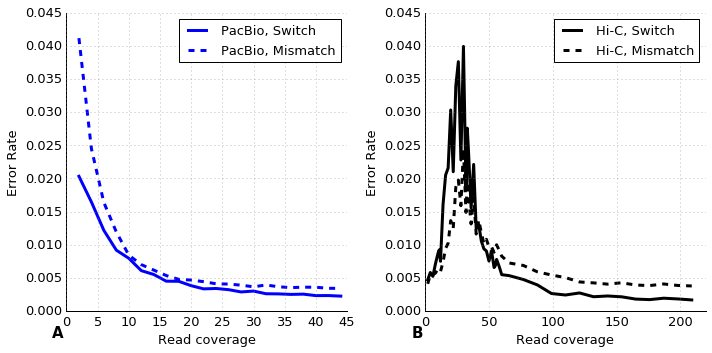

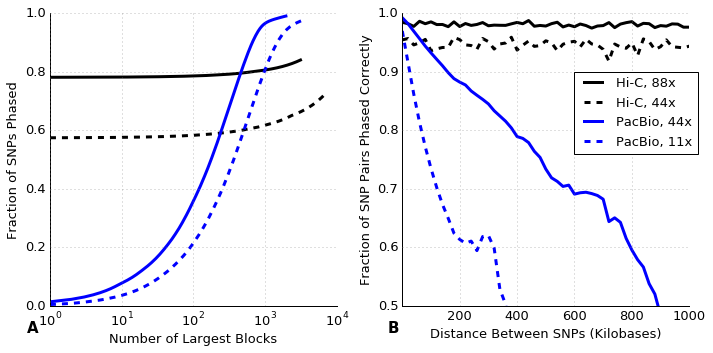

In [53]:
import matplotlib
%matplotlib inline
import error_rates
import fileIO
from matplotlib import pyplot as plt

fig = plt.figure(figsize=(10,5))

############################################################################################


pacbio_switch_rates = []
pacbio_mismatch_rates = []

for err in pacbio_errs:
    pacbio_switch_rates.append(err.get_switch_rate())
    pacbio_mismatch_rates.append(err.get_mismatch_rate())

ax1=plt.subplot(1,2,1)
plt.plot(pacbio_covs,pacbio_switch_rates,  color='b',linestyle='-',label='PacBio, Switch')
plt.plot(pacbio_covs,pacbio_mismatch_rates,  color='b',linestyle='--',label='PacBio, Mismatch')

plt.ylim(0,0.045)
plt.xlabel("Read coverage")
plt.ylabel("Error Rate")
plt.tight_layout()
#plt.legend(loc='lower right',scatterpoints = 1)
plt.grid(True,color='grey')
ax1.spines["top"].set_visible(False)
ax1.spines["right"].set_visible(False)
#ax2.spines["bottom"].set_visible(False)
#ax2.spines["left"].set_visible(False)
plt.tick_params(axis="both", which="both", bottom="off", top="off",
            labelbottom="on", left="off", right="off", labelleft="on")
ax1.text(-0.05, -0.05, 'A', transform=ax1.transAxes,fontsize=15, fontweight='bold', va='top')
plt.legend(loc='upper right',scatterpoints = 1)


############################################################################################

chrom = 'chr{}'.format(chrnum)
switch_rates_mboI = []
mismatch_rates_mboI = []
switch_mismatch_rates_mboI = []
for err in errs_mboI:
    switch_rates_mboI.append(err.get_switch_rate())
    mismatch_rates_mboI.append(err.get_mismatch_rate())

ax2=plt.subplot(1,2,2)
plt.plot(mboI_covs,switch_rates_mboI, color='k',linestyle='-',label='Hi-C, Switch')
plt.plot(mboI_covs,mismatch_rates_mboI,  color='k',linestyle='--',label='Hi-C, Mismatch')

plt.xlim(0,220)
plt.ylim(0,0.045)
plt.xlabel("Read coverage")
plt.ylabel("Error Rate")
plt.tight_layout()
#plt.legend(loc='lower right',scatterpoints = 1)
plt.grid(True,color='grey')
ax2.spines["top"].set_visible(False)
ax2.spines["right"].set_visible(False)
#ax2.spines["bottom"].set_visible(False)
#ax2.spines["left"].set_visible(False)
plt.tick_params(axis="both", which="both", bottom="off", top="off",
            labelbottom="on", left="off", right="off", labelleft="on")
ax2.text(-0.05, -0.05, 'B', transform=ax2.transAxes,fontsize=15, fontweight='bold', va='top')
plt.legend(loc='upper right',scatterpoints = 1)
plt.tight_layout()
plt.savefig("hapcut2_paper/plots/jupyter/pacbio_vs_hic2.png",bbox_inches='tight')


############################################################################################
fig = plt.figure(figsize=(10,5))

ax3 = plt.subplot(1,2,1)
plt.plot(num_blks_mboI88,frac_phased_mboI88, color='k',linestyle='-',label='Hi-C, 88x')
plt.plot(num_blks_mboI44,frac_phased_mboI44, color='k',linestyle='--',label='Hi-C, 44x')
plt.plot(num_blks_pacbio44,frac_phased_pacbio44, color='b',linestyle='-',label='PacBio, 44x')
plt.plot(num_blks_pacbio11,frac_phased_pacbio11, color='b',linestyle='--',label='PacBio, 11x')


plt.ylim(0,1)
plt.xscale('log')
plt.xlabel("Number of Largest Blocks")
plt.ylabel("Fraction of SNPs Phased")
#plt.legend(loc='lower right')
plt.grid(True,color='grey')
ax3.spines["top"].set_visible(False)
ax3.spines["right"].set_visible(False)
#ax.spines["bottom"].set_visible(False)
#ax.spines["left"].set_visible(False)
plt.tick_params(axis="both", which="both", bottom="off", top="off",
            labelbottom="on", left="off", right="off", labelleft="on")
ax3.text(-0.08, -0.05, 'A', transform=ax3.transAxes,fontsize=15, fontweight='bold', va='top')

############################################################################################


ax4 = plt.subplot(1,2,2)

# fosmid needs to be cut off at the first point it hits 0.5
p11_cut = 1
for stat in h_p11.get_error_stats():
    if stat <= 0.5:
        break
    p11_cut += 1

plt.plot(hic88.get_bin_starts(),hic88.get_error_stats(), color='k',linestyle='-',label='Hi-C, 88x')
plt.plot(hic44.get_bin_starts(),hic44.get_error_stats(), color='k',linestyle='--',label='Hi-C, 44x')
plt.plot(h_p44.get_bin_starts(),h_p44.get_error_stats(), color='b',linestyle='-',label='PacBio, 44x')
plt.plot(h_p11.get_bin_starts()[0:p11_cut],h_p11.get_error_stats()[0:p11_cut], color='b',linestyle='--',label='PacBio, 11x')

plt.xlim(0,int(1e6))
plt.ylim(0.5,1)
plt.xticks([200000,400000,600000,800000,1000000], [200,400,600,800,1000])
plt.xlabel("Distance Between SNPs (Kilobases)")
plt.ylabel("Fraction of SNP Pairs Phased Correctly")
plt.grid(True,color='grey')
ax4.spines["top"].set_visible(False)
ax4.spines["right"].set_visible(False)
plt.tick_params(axis="both", which="both", bottom="off", top="off",
            labelbottom="on", left="off", right="off", labelleft="on")
#box = ax4.get_position()
#ax4.set_position([box.x0, box.y0, box.width * 0.8, box.height])
# Put a legend to the right of the current axis
#ax4.legend(loc='center left', ncol=2,bbox_to_anchor=(0.05, 1.13))
#ax4.legend
ax4.text(-0.05, -0.05, 'B', transform=ax4.transAxes,fontsize=15, fontweight='bold', va='top')
#plt.xlim((0,100000))
plt.legend(bbox_to_anchor=(0.6, 0.8), loc=2, borderaxespad=0.)
plt.tight_layout()
plt.savefig("hapcut2_paper/plots/jupyter/pacbio_vs_hic1.png",bbox_inches='tight')

#plt.show()


In [55]:
for c, sr in zip(hindIII_covs,switch_rates_hindIII):
    print("{}\t{}".format(c,sr))

2	0.0
4	0.0
6	0.019230769230769232
8	0.006349206349206349
10	0.07367387033398821
11	0.019801980198019802
12	0.027385892116182572
14	0.026078234704112337
16	0.04949355432780847
18	0.038758231420507994
20	0.03110855073656489
22	0.03362335938652116
24	0.031979489947375525
26	0.038410428399670946
28	0.01165348712765325
30	0.016497680013748066
32	0.013133413593083069
33	0.017975997065143336
34	0.013187385978629137
36	0.012271162767496383
38	0.011436391183226625
40	0.009518773135906928
42	0.011757021554539516
44	0.01009506564056134
46	0.013507489300998574
48	0.009600895509536316
50	0.007804546996946046
52	0.007319725614856952
54	0.010392704567860664
55	0.009212832742244506
56	0.009301949365040847
58	0.009069117059528566
60	0.008198019801980198
66	0.0073482065073292675
77	0.007146647797629577
88	0.008242317346177329
99	0.008088259083114951
110	0.0064388311045071814
121	0.007353820399378213
132	0.00787561166285433
143	0.007574686978886973
154	0.007835913227571416
165	0.007827420179143018
176	0

Pruning Rate Analysis
=====

In [31]:
# import fileIO

h_err1 = []
hapcut2_blocks = 'hapcut2_paper/experiments/pacbio_error_analysis/chr1.output'
runtime_file = '/home/peter/data/runtime_filler' # we don't care about runtime either
vcf_file  = 'hapcut2_paper/data/NA12878_VCFs_hg19/chr1.vcf'
frag_file = 'hapcut2_paper/data/pacbio11/chr1'
output_file = None

#vary SNP confidence for hapcut2
err = error_rates.hapblock_vcf_error_rate(hapcut2_blocks, frag_file, vcf_file, runtime_file,use_SNP_index=True)
h_err1.append(err)
snp_cutoffs = [0.75,0.9,0.95,0.99,0.999,0.9999,0.99999]
for i,snp_cutoff in enumerate(snp_cutoffs):
    output_file = 'hapcut2_paper/experiments/pacbio_error_analysis/hapcut2.prune{}'.format(i)
    fileIO.prune_hapblock_file(hapcut2_blocks, output_file, snp_cutoff, -1, False)
    err = error_rates.hapblock_vcf_error_rate(output_file, frag_file, vcf_file, runtime_file,use_SNP_index=True)
    h_err1.append(err)

In [32]:
#vary SNP confidence for probhap
p_err1 = []
probhap_blocks = 'hapcut2_paper/experiments/pacbio11/chr1/probhap.output'
emission_cutoffs = [0,0.00001,0.00005,0.0001,0.0005,0.001,0.005,0.01]
for i,emission_cutoff in enumerate(emission_cutoffs):
    output_file = 'hapcut2_paper/experiments/pacbio_error_analysis/probhap.prune{}'.format(i)
    fileIO.prune_probhap_file(probhap_blocks, output_file, emission_cutoff, -1)
    err = error_rates.hapblock_vcf_error_rate(output_file, frag_file, vcf_file, runtime_file,use_SNP_index=True)
    p_err1.append(err)

In [33]:

h_err2 = []
split_cutoffs = [-1,0.5,0.75,0.9,0.99,0.999,0.9999,0.99999,0.999999,0.9999999,0.99999999999]
for i,split_cutoff in enumerate(split_cutoffs):
    output_file = 'hapcut2_paper/experiments/pacbio_error_analysis/hapcut2.split{}'.format(i)
    fileIO.prune_hapblock_file(hapcut2_blocks, output_file, -1, split_cutoff, False)
    err = error_rates.hapblock_vcf_error_rate(output_file, frag_file, vcf_file, runtime_file,use_SNP_index=True)
    h_err2.append(err)

In [34]:

p_err2 = []
probhap_blocks = 'hapcut2_paper/experiments/pacbio11/chr1/probhap.output.uncorrected'
split_cutoffs2 = [-1,0.5,0.6,0.7,0.8,0.9,0.99,0.999,0.9999,0.99999,0.999999]
for i,split_cutoff in enumerate(split_cutoffs2):
    output_file = 'hapcut2_paper/experiments/pacbio_error_analysis/probhap.split{}'.format(i)
    fileIO.prune_probhap_file(probhap_blocks, output_file, -1, split_cutoff)
    err = error_rates.hapblock_vcf_error_rate(output_file, frag_file, vcf_file, runtime_file,use_SNP_index=True)
    p_err2.append(err)

In [35]:
refhap_blocks = 'hapcut2_paper/experiments/pacbio11/chr1/refhap.output'
r_err = error_rates.hapblock_vcf_error_rate(refhap_blocks, frag_file, vcf_file, runtime_file,use_SNP_index=True)

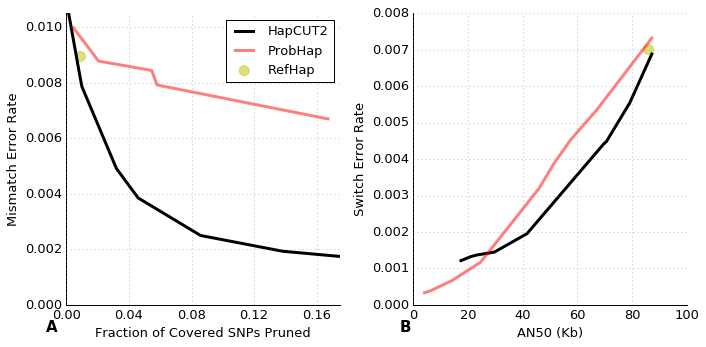

In [51]:
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(10,5))
ax1 = plt.subplot(121)
plt.plot([err.get_missing_rate() for err in h_err1],[err.get_mismatch_rate() for err in h_err1],color='k',label='HapCUT2')
plt.plot([err.get_missing_rate() for err in p_err1],[err.get_mismatch_rate() for err in p_err1],color='r',alpha=0.5,label='ProbHap')
plt.scatter([r_err.get_missing_rate()],[r_err.get_mismatch_rate()],s=100,color='y',alpha=0.5,label='RefHap')
#plt.ylim(0.5,1)
plt.xlim(0,0.175)
plt.ylim(0,0.0105)

plt.xlabel("Fraction of Covered SNPs Pruned")
plt.ylabel("Mismatch Error Rate")
plt.grid(True,color='grey')
ax1.set_xticks([0,0.04,0.08,0.12,0.16])
#ax1.set_xticklabels(['0.01','0.1','1','10'])
ax1.spines["top"].set_visible(False)
ax1.spines["right"].set_visible(False)
plt.tick_params(axis="both", which="both", bottom="off", top="off",
            labelbottom="on", left="off", right="off", labelleft="on")
ax1.text(-0.075, -0.05, 'A', transform=ax1.transAxes,fontsize=15, fontweight='bold', va='top')

plt.legend(scatterpoints = 1)

ax2 = plt.subplot(122)
plt.plot([err.get_AN50()/1000 for err in h_err2],[err.get_switch_rate() for err in h_err2],color='k',label='HapCUT2')
plt.plot([err.get_AN50()/1000 for err in p_err2],[err.get_switch_rate() for err in p_err2],color='r',alpha=0.5,label='ProbHap')
plt.scatter([r_err.get_AN50()/1000],[r_err.get_switch_rate()],s=100,color='y',alpha=0.5,label='RefHap')

plt.xlim(0,int(1e2))
plt.ylim(0,0.008)
plt.xlabel("AN50 (Kb)")
plt.ylabel("Switch Error Rate")
plt.grid(True,color='grey')
ax2.spines["top"].set_visible(False)
ax2.spines["right"].set_visible(False)
plt.tick_params(axis="both", which="both", bottom="off", top="off",
            labelbottom="on", left="off", right="off", labelleft="on")
#plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
ax2.text(-0.05, -0.05, 'B', transform=ax2.transAxes,fontsize=15, fontweight='bold', va='top')

plt.tight_layout()
plt.savefig("hapcut2_paper/plots/jupyter/pruning_pacbio11.png",bbox_inches='tight')

#plt.tight_layout()
#plt.legend(loc='upper left',scatterpoints = 1)

In [37]:
print(frac_phased_mboI88[-1])
print(frac_phased_pacbio44[-1])

0.8404050262291082
0.990590053271522


Plot H-Trans Estimates
===

In [38]:
from matplotlib import pyplot as plt
from estimate_htrans_probs_known_phase import estimate_htrans_probs
import os

s = 10
cov = 88

def chunks(l, n):
    """Yield successive n-sized chunks from l."""
    for i in range(0, len(l), n):
        yield l[i:i+n]
        
def smooth(l,count):
    return [sum(x)/len(x) for x in chunks(l,count)]

def read_distfile(f):
    result = []
    with open(f) as infile:
        for line in infile:
            el = line.strip().split()
            result.append(float(el[1]))
            
    return result

exp_dir = 'hapcut2_paper/experiments/htrans_estimation/'
if not os.path.exists(exp_dir):
    os.makedirs(exp_dir)

chr1_em_file = 'hapcut2_paper/experiments/hic/hapcut_htrans/mboI/cov{}/hapcut2/chr1.htrans_model'.format(cov)
chr19_em_file = 'hapcut2_paper/experiments/hic/hapcut_htrans/mboI/cov{}/hapcut2/chr19.htrans_model'.format(cov)
chr1_gt_file = exp_dir+'chr1.{}.GT'.format(cov)
chr19_gt_file = exp_dir+'chr19.{}.GT'.format(cov)

chr1_vcf = 'hapcut2_paper/data/NA12878_VCFs_hg19/chr1.vcf'
chr19_vcf = 'hapcut2_paper/data/NA12878_VCFs_hg19/chr19.vcf'
chr1_frags = 'hapcut2_paper/data/hic_mboI_subsamples/cov{}/chr1'.format(cov)
chr19_frags = 'hapcut2_paper/data/hic_mboI_subsamples/cov{}/chr19'.format(cov)

estimate_htrans_probs(chr1_frags,chr1_vcf,chr1_gt_file,bin_size=1000000)
estimate_htrans_probs(chr19_frags,chr19_vcf,chr19_gt_file,bin_size=1000000)

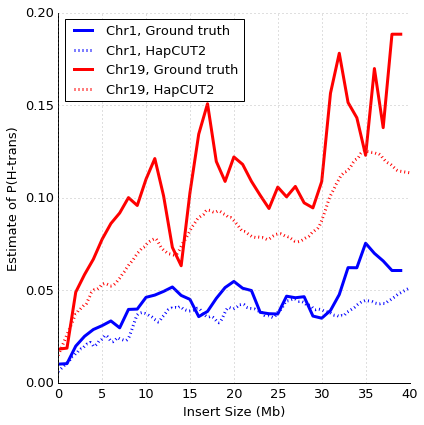

In [39]:
from scipy.signal import savgol_filter

def smooth(l):
    return savgol_filter(l,501,1)

chr1_gt = read_distfile(chr1_gt_file)
chr1_em = read_distfile(chr1_em_file)
chr19_gt = read_distfile(chr19_gt_file)
chr19_em = read_distfile(chr19_em_file)

l = len(chr1_gt)
xdata1 = list(range(0,42000000,1000000))
xdata2 = list(range(0,42000000,5000))

plt.figure(figsize=(6,6))
ax = plt.subplot(111)
plt.plot(xdata1[:len(chr1_gt)],chr1_gt, color='b',linestyle='-',label='Chr1, Ground truth')
plt.plot(xdata2[:len(chr1_em)],smooth(chr1_em),  color='b',linestyle='dotted',label='Chr1, HapCUT2')
plt.plot(xdata1[:len(chr19_gt)],chr19_gt,  color='r',linestyle='-',label='Chr19, Ground truth')
plt.plot(xdata2[:len(chr19_em)],smooth(chr19_em), color='r',linestyle='dotted',label='Chr19, HapCUT2')
#plt.title("88x Hi-C H-trans probabilities: Ground truth estimate vs HapCUT2 estimate")
plt.grid(True,color='grey')
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
plt.tick_params(axis="both", which="both", bottom="off", top="off",
            labelbottom="on", left="off", right="off", labelleft="on")
plt.xlabel("Insert Size (Mb)")
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.ylabel("Estimate of P(H-trans)")
plt.legend(loc='best')
plt.tight_layout()
plt.ylim(0,0.2)
plt.xticks(list(range(0,44000000,5000000)),list(range(0,44,5)))
plt.tight_layout()
plt.savefig("hapcut2_paper/plots/jupyter/hic_htrans_estimates.png",bbox_inches='tight')

/usr/lib/python3.5/site-packages/matplotlib/__init__.py:1350: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


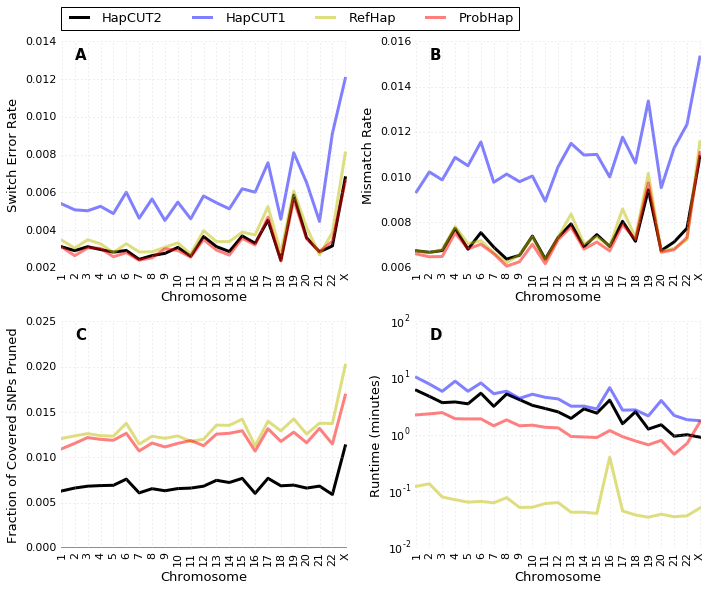

In [40]:
import pickle
import plot_data
# make fosmid plot
stats_file = 'hapcut2_paper/error_rates/tool_comparisons/fosmid.stats.p'
labels_file = 'hapcut2_paper/error_rates/tool_comparisons/fosmid.labels.p'
output = 'hapcut2_paper/plots/jupyter/fosmid.png'
data = pickle.load(open(stats_file,"rb"))
labels = pickle.load(open(labels_file,"rb"))
data = data[:4]
labels = labels[:4]
plot_data.plot_experiment(data,labels,[4],output,runtime_as_log=True,doplots=[1,1,1,0,0,1])
plt.savefig(output,bbox_inches='tight')

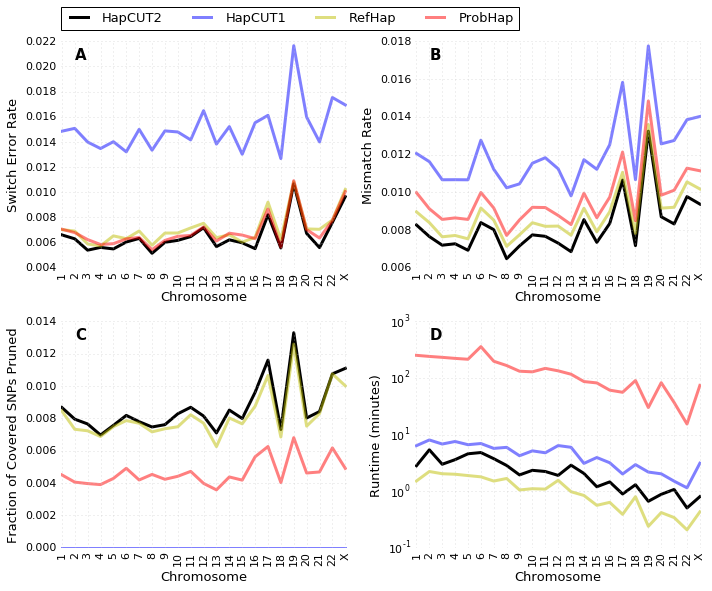

In [41]:

# make pacbio11 plot
stats_file = 'hapcut2_paper/error_rates/tool_comparisons/pacbio11.stats.p'
labels_file = 'hapcut2_paper/error_rates/tool_comparisons/pacbio11.labels.p'
output = 'hapcut2_paper/plots/jupyter/pacbio11.png'
data = pickle.load(open(stats_file,"rb"))
labels = pickle.load(open(labels_file,"rb"))
data = data[:4]
labels = labels[:4]
plot_data.plot_experiment(data,labels,[],output,runtime_as_log=True,doplots=[1,1,1,0,0,1])
plt.savefig(output,bbox_inches='tight')

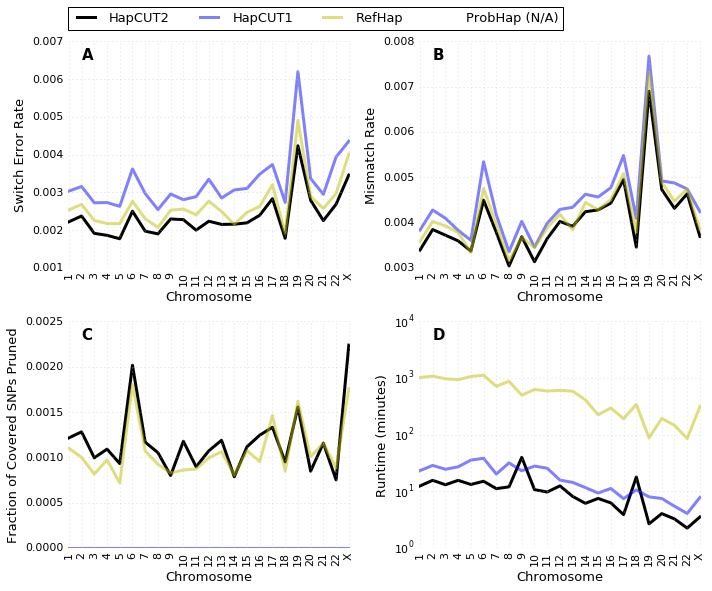

In [42]:

# make pacbio44 plot
stats_file = 'hapcut2_paper/error_rates/tool_comparisons/pacbio44.stats.p'
labels_file = 'hapcut2_paper/error_rates/tool_comparisons/pacbio44.labels.p'
output = 'hapcut2_paper/plots/jupyter/pacbio44.png'
data = pickle.load(open(stats_file,"rb"))
labels = pickle.load(open(labels_file,"rb"))
data = data[:4]
labels = labels[:4]
plot_data.plot_experiment(data,labels,[3],output,runtime_as_log=True,doplots=[1,1,1,0,0,1])
plt.savefig(output,bbox_inches='tight')

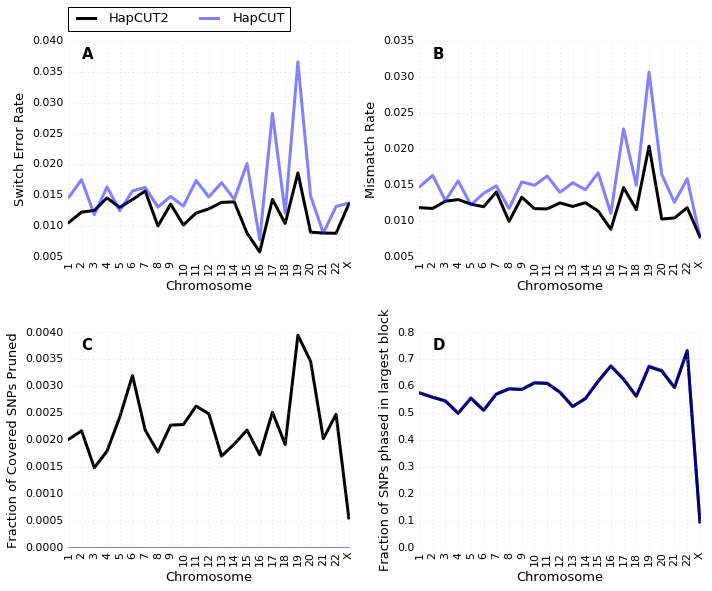

In [43]:

# make hic 44x plot
stats_file = 'hapcut2_paper/error_rates/hic/hapcut_htrans_44.stats.p'
#labels_file = 'hapcut2_paper/error_rates/hic/hapcut_htrans_44.labels.p'
output = 'hapcut2_paper/plots/jupyter/hapcut_htrans44.png'
data = pickle.load(open(stats_file,"rb"))
labels = ['HapCUT2','HapCUT']
#pickle.load(ope2n(labels_file,"rb"))
data.reverse() # data was backward in the snakefile
plot_data.plot_experiment(data,labels,[],output,runtime_as_log=True,doplots=[1,1,1,1,0,0])
plt.savefig(output,bbox_inches='tight')

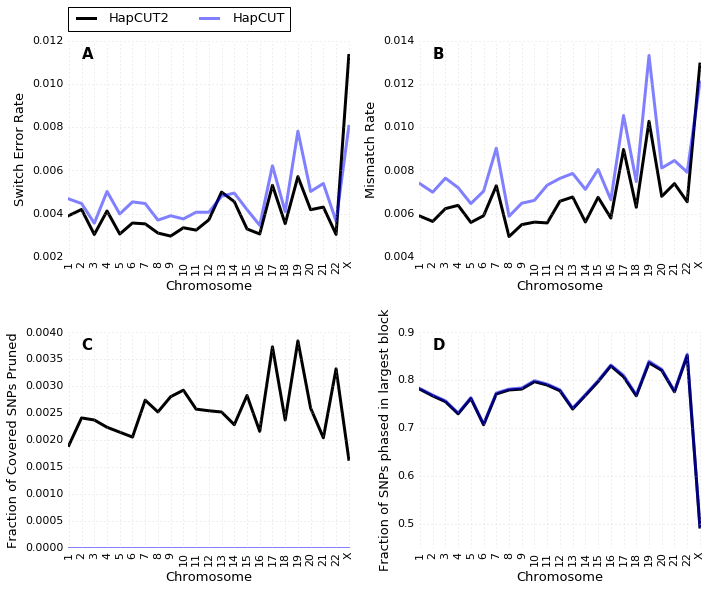

In [83]:
import pickle
import plot_data
import matplotlib
%matplotlib inline

# make hic 88x plot
stats_file = 'hapcut2_paper/error_rates/hic/hapcut_htrans_88.stats.p'
labels_file = 'hapcut2_paper/error_rates/hic/hapcut_htrans_88.labels.p'
output = 'hapcut2_paper/plots/jupyter/hapcut_htrans88.png'
data = pickle.load(open(stats_file,"rb"))
#pickle.load(open(labels_file,"rb"))
labels = ['HapCUT2','HapCUT']
data.reverse() # data was backward in the snakefile
plot_data.plot_experiment(data,labels,[],output,runtime_as_log=True,doplots=[1,1,1,1,0,0])
plt.savefig(output,bbox_inches='tight')

In [93]:
#print(max([d.get_max_blk_snp_percent() for d in data[0]]))
#print(min([d.get_max_blk_snp_percent() for d in data[0]]))
for d in sorted([d.get_max_blk_snp_percent() for d in data[0]]):
    print(d)
    
#for d in [d.get_max_blk_snp_percent() for d in data[0]]:
#    print(d)

0.49347990746995846
0.7071045576407506
0.7300179557315702
0.7400153911391013
0.7554503095027549
0.7620794726696101
0.7674615533660091
0.7676097287109257
0.7684132430677919
0.7715201562400492
0.7760249774053077
0.7781848459616986
0.7798385894678563
0.7813671668496605
0.78176027149573
0.7901720690251067
0.7971906104164961
0.7973344295635993
0.8074728225785628
0.8208613798906185
0.8301471440157572
0.836760399282048
0.8517023517023518


In [56]:
# make pacbio11 plot
stats_file = 'hapcut2_paper/error_rates/tool_comparisons/pacbio11.stats.p'
labels_file = 'hapcut2_paper/error_rates/tool_comparisons/pacbio11.labels.p'
output = 'hapcut2_paper/plots/jupyter/pacbio11.png'
data = pickle.load(open(stats_file,"rb"))
labels = pickle.load(open(labels_file,"rb"))

In [58]:
HapCUT2_pacbio44_dat = data[0]


In [64]:
HapCUT2_total_dat = sum(HapCUT2_pacbio44_dat, error_rates.error_result(tool_name=None))

AttributeError: 'error_result' object has no attribute 'tool_name'

In [69]:
import error_rates

chroms = ['chr{}'.format(x) for x in range(1,23)]+['chrX']
pacbio44_err = error_rates.error_result()

for chrom in chroms:
    
    frag_file = 'hapcut2_paper/data/pacbio44/{}'.format(chrom)
    vcf_file  = 'hapcut2_paper/data/NA12878_VCFs_hg19/{}.vcf'.format(chrom)
    assembly_file = 'hapcut2_paper/experiments/pacbio44/{}/hapcut2.output'.format(chrom)
    runtime_file  = 'hapcut2_paper/experiments/pacbio44/{}/hapcut2.runtime'.format(chrom)
    pacbio44_err += error_rates.hapblock_vcf_error_rate(assembly_file, frag_file, vcf_file, runtime_file, use_SNP_index=True, tool_name='HapCUT2', dataset_name='PacBio44',largest_blk_only=False)


In [70]:
print(pacbio44_err)


tool:            HapCUT2
dataset:         PacBio44
switch rate:     0.002232694180205597
mismatch rate:   0.0038487919308679563
flat rate:       0.042027804475636144
missing rate:    0.0011765973774965355
switch errors:   2974
poss. switch:    1332023
mismatch errors: 5370
poss. mismatch:  1395243
flat errors:     58639
poss. flat:      1395243
phased count:    1686781
num covered:     1688768
AN50:            218440.0
N50:             56021
max blk snp %:   0.015725231908113053
runtime:         14711.023564577103
        


In [75]:
total_spanlst = []
for lst in pacbio44_err.N50_spanlst.values():
    total_spanlst += lst

In [82]:
max(total_spanlst)/1000000

1.662081

In [79]:
len(pacbio44_err.N50_spanlst['chr20'])

547

In [96]:
import error_rates
import statistics

chroms = ['chr{}'.format(x) for x in range(1,23)]+['chrX']
small_blks = []

for chrom in chroms:
    vcf_file  = 'hapcut2_paper/data/NA12878_VCFs_hg19/{}.vcf'.format(chrom)
    assembly_file = 'hapcut2_paper/experiments/hic/hapcut_htrans/mboI/cov88/hapcut2/{}.output'.format(chrom)
    hapblocks = fileIO.parse_hapblock_file(assembly_file)
    lenlst = sorted([len(x) for x in hapblocks],reverse=True)[1:]
    small_blks += lenlst
    
print("median small blk size: {}".format(statistics.median(small_blks)))

    

median small blk size: 2.0


In [1]:
import pickle
labels = pickle.load(open('hapcut2_paper/error_rates/tool_comparisons/sim_vary_coverage.labels.p','rb'))
stats = pickle.load(open('hapcut2_paper/error_rates/tool_comparisons/sim_vary_coverage.stats.p','rb'))

In [2]:
labels

['HapCUT2', 'HapCUT1', 'RefHap', 'ProbHap', 'DGS', 'FastHare']

In [4]:
import error_rates
total = 0
for err in stats[5][19]:
    total += err.get_switch_mismatch_rate()
fasthare_error = total/10

total = 0
for err in stats[0][19]:
    total += err.get_switch_mismatch_rate()
hapcut2_error = total/10

In [5]:
fasthare_error/hapcut2_error

7.582445982631364